B051  
Ved Naik  
B1 Batch  
Lab 8

Aim : To segment objects in the image using region growing method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image = np.array([[1,5,0,3,9],[5,7,5,2,6],[0,6,0,5,0],[1,5,1,3,8]])  # imshow is 8 bit but greater than 8 bit is normalized
mx = np.max(np.max(image))   # max from each col and we get 4 rows with 1 column and then again max as 1 element

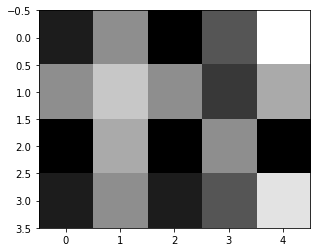

In [8]:
plt.imshow(image,cmap='gray')

In [9]:
mx

9

In [22]:
def dist(a,b):
    return np.abs(a-b)   # absolute value (modulus)

def region_grow(img,img_g,threshold,seed):  #  g is grwoing initialized all values with 0
    rw=seed[0]
    cl=seed[1]
    px=img[rw,cl]
    img_g[rw,cl]=1
    [rows,cols]=img.shape
    
    if (cl+1<cols and img_g[rw,cl+1]==0 and dist(px,img[rw,cl+1])<=threshold):
        region_grow(img,img_g,threshold,[rw,cl+1])
    
    if (cl-1>=0 and img_g[rw,cl-1]==0 and dist(px,img[rw,cl-1])<=threshold):
        region_grow(img,img_g,threshold,[rw,cl-1])
        
    if (rw+1<rows and img_g[rw+1,cl]==0 and dist(px,img[rw+1,cl])<=threshold):
        region_grow(img,img_g,threshold,[rw+1,cl])
    
    if (rw-1>=0 and img_g[rw-1,cl]==0 and dist(px,img[rw-1,cl])<=threshold):
        region_grow(img,img_g,threshold,[rw-1,cl])
    
t=2
seed=[1,1]
img_seg = np.zeros(image.shape)
region_grow(image,img_seg,t,seed)

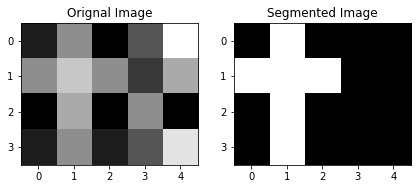

In [23]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Orignal Image")
plt.imshow(image,cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Segmented Image')
plt.imshow(img_seg,cmap='gray')

# Segmented image has only 2 values 0 and 1 so pyhton automatically converts it to binary 

In [26]:
image_grown = image.copy()
rows,cols = image.shape

In [27]:
for r in range(rows):
    for c in range(cols):
        if(img_seg[r,c]==1):
            image_grown[r,c]=mx
            # here we took mx as segmented image was binary so 1 is white but our orignal image is 8 bit gray so
            # if we take = 1 then pixel will be black but we want white so we take mx

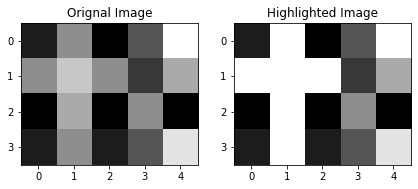

In [30]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Orignal Image")
plt.imshow(image,cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Highlighted Image')
plt.imshow(image_grown,cmap='gray')

In [37]:
from skimage import io
from skimage.color import rgb2gray

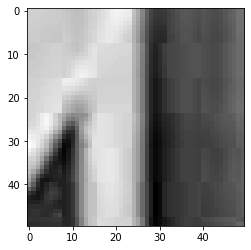

In [74]:
image = io.imread('lenna_grey.jpg')
image = 255*rgb2gray(image)
image = image[0:50,0:50]
plt.imshow(image,cmap="gray")

In [75]:
mx = np.max(np.max(image))
[rows,cols]=image.shape

In [76]:
seed = [5,10]
t=5
img_seg = np.zeros(image.shape)
region_grow(image,img_seg,t,seed)
img_seg = 255*img_seg

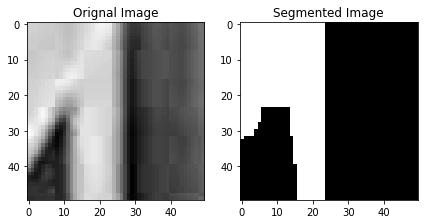

In [77]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Orignal Image")
plt.imshow(image,cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Segmented Image')
plt.imshow(img_seg,cmap='gray')

In [78]:
image_grown = image.copy()
rows,cols = image.shape

In [79]:
for r in range(rows):
    for c in range(cols):
        if(img_seg[r,c]==255):
            image_grown[r,c]=mx
            # here we took mx as segmented image was binary so 1 is white but our orignal image is 8 bit gray so
            # if we take = 1 then pixel will be black but we want white so we take mx


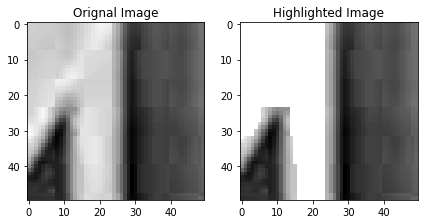

In [80]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Orignal Image")
plt.imshow(image,cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Highlighted Image')
plt.imshow(image_grown,cmap='gray')

Conclusion : Region growing is used to segment the obj with given seed value and location of seed is within the obj itself.
Region grwoing method is applied on both cases test cases as well as given image.